<a href="https://colab.research.google.com/github/neavepaul/MozillaTalkML/blob/main/classification/cnn_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define constants
image_size = (224, 224)
batch_size = 32
num_classes = 3

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Mozilla Talk/classification_normalised',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Create a convolutional neural network
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=20)

# Save the trained model
model.save('meme_classification_model.h5')

print("Model trained and saved successfully!")


Found 42 images belonging to 3 classes.
Epoch 1/20
2/2 [==============================] - 12s 6s/step - loss: 1.9243 - accuracy: 0.2381
Epoch 2/20
2/2 [==============================] - 9s 2s/step - loss: 1.3469 - accuracy: 0.4286
Epoch 3/20
2/2 [==============================] - 8s 5s/step - loss: 1.1063 - accuracy: 0.4286
Epoch 4/20
2/2 [==============================] - 7s 2s/step - loss: 1.0543 - accuracy: 0.4762
Epoch 5/20
2/2 [==============================] - 8s 2s/step - loss: 0.8823 - accuracy: 0.5476
Epoch 6/20
2/2 [==============================] - 9s 2s/step - loss: 0.8999 - accuracy: 0.6429
Epoch 7/20
2/2 [==============================] - 7s 4s/step - loss: 0.6538 - accuracy: 0.7619
Epoch 8/20
2/2 [==============================] - 7s 4s/step - loss: 0.8075 - accuracy: 0.7143
Epoch 9/20
2/2 [==============================] - 9s 4s/step - loss: 0.6927 - accuracy: 0.6667
Epoch 10/20
2/2 [==============================] - 7s 2s/step - loss: 0.5619 - accuracy: 0.8095
Epoch 11

1/1 [==============================] - 0s 171ms/step


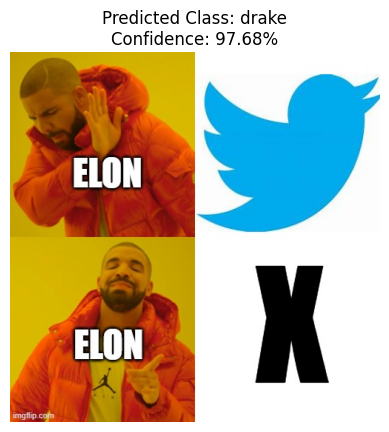

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the pre-trained model
model = tf.keras.models.load_model('meme_classification_model.h5')  # Replace with the actual path to your model

# Define class names
class_names = ['drake', 'incredible', 'spidey']

# Load and preprocess the input image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Path to the input image
input_image_path = 'drake1.jpg'

# Load and preprocess the image
input_image = load_and_preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class]
confidence = predictions[0][predicted_class] * 100

# Display the image and prediction
plt.imshow(image.load_img(input_image_path))
plt.title(f'Predicted Class: {predicted_class_name}\nConfidence: {confidence:.2f}%')
plt.axis('off')
plt.show()
